In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import math

In [ ]:
path_train = 'drive/MyDrive/data_coffee.csv'
path_test = 'drive/MyDrive/data_coffee_test.csv'

In [ ]:
data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

In [ ]:
data_train.head()
data_test.head()

In [ ]:
data_train.describe()
data_test.describe()

In [ ]:
data_train.dtypes

In [ ]:
config, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
ax1.hist(data_train['Temperature'])
ax2.hist(data_train['Gas_Price'])
ax3.hist(data_train['Oil_Price'])
plt.show()

In [ ]:
data_train.info
data_test.info

In [ ]:
data_train.isnull().sum()
data_test.isnull().sum()

In [ ]:
plt.boxplot(data_train['Gas_Price'])

In [ ]:
plt.boxplot(data_train['Oil_Price'])

In [ ]:
plt.boxplot(data_train['Coffee_price'])

In [ ]:
#Data is not imbalance and Data hasn't noise

In [ ]:
data_train.pop('Date')
date_predict = data_test.pop('Date')

<Axes: >

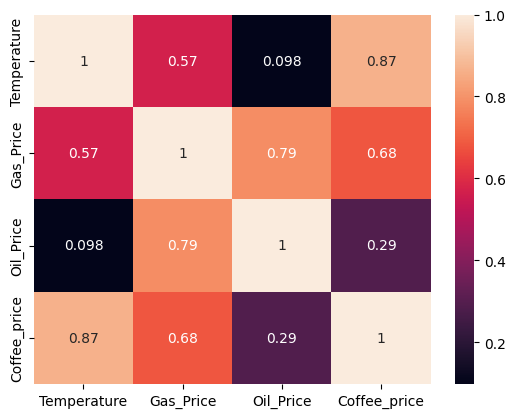

In [ ]:
sns.heatmap(data_train.corr(), annot=True)

In [ ]:
#After seeing heat map, Oil_Price don't impact to Coffee_price so we will delete this attribute

In [ ]:
# data_train = data_train.drop(['Oil_Price'], axis = 1)
# data_test = data_test.drop(['Oil_Price'], axis = 1)

Text(0, 0.5, 'Coffee_price (VND/kg)')

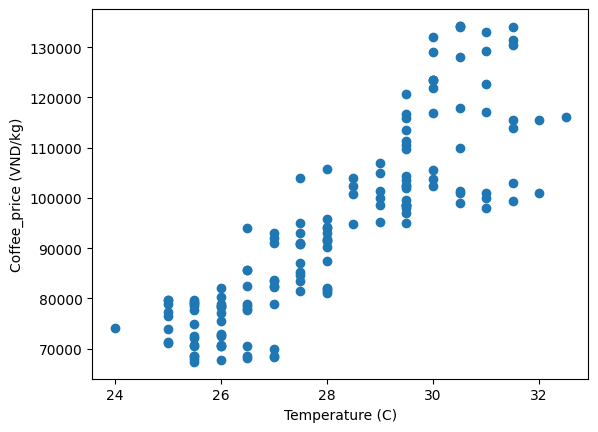

In [ ]:
#scatter for temperator and coffee price
plt.scatter(data_train['Temperature'], data_train['Coffee_price'])
plt.xlabel('Temperature (C)')
plt.ylabel('Coffee_price (VND/kg)')

In [ ]:
#See this scatter, when temperature up, coffee_price will up. The cost of coffee_price is highest when temperature is about 30 to 32 'C

In [ ]:
#Because data is a quite of with 152 records, so we will kfold for train and validation to result better than

In [ ]:
X_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:, -1]
X_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1]

X_train_rf = X_train.copy()
X_test_rf = X_test.copy()

In [ ]:
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [20, 50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 10]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
best_params_rf = grid_search_rf.best_params_
print("Best parameters for SVR found: ", best_params_rf)

Best parameters for SVR found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# RFR = RandomForestRegressor(random_state=42)
SVR_model = SVR(kernel = 'linear')

param_grid_svr = {
    'C': [0.1, 1, 10, 100, 1000, 1200, 1500, 2000, 4000, 5000, 10000],
    'epsilon': [0.001, 0.01, 0.1, 1],
}

# param_grid_rf = {
#     'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200],
#     'max_depth': [None, 10, 20, 30, 40],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 6, 8, 10]
# }


grid_search_svr = GridSearchCV(estimator=SVR_model, param_grid=param_grid_svr, cv= 10, n_jobs=-1, scoring='neg_mean_squared_error')


grid_search_svr.fit(X_train, y_train)
best_params_svr = grid_search_svr.best_params_
print("Best parameters for SVR found: ", best_params_svr)

# grid_search_rf.fit(X_train, y_train)
# best_params_rf = grid_search_rf.best_params_
# print("Best parameters for SVR found: ", best_params_rf)

In [ ]:
svr = SVR(**best_params_svr)
rf = RandomForestRegressor(**best_params_rf)

svr.fit(X_train, y_train)
rf.fit(X_train_rf, y_train)

In [ ]:
#See to 2 map with random forest regressor MSE and SVR MSE (MSE = mean squared error), SVR isn't better than Random Forest.
#So we test data after cross validating with kfold = 15. Data test include records about 1/6/2024 to 15/6/2024

In [ ]:
RF_prediction = rf.predict(X_test_rf)
SVR_prediction = svr.predict(X_test)
RF_mse = math.sqrt(mean_squared_error(y_test, RF_prediction))
SVR_mse = math.sqrt(mean_squared_error(y_test, SVR_prediction))

RF_mae = np.mean(np.abs(y_test - RF_prediction))
SVR_mae = np.mean(np.abs(y_test - SVR_prediction))
print(RF_mae, SVR_mae)

RF_mape = np.mean(np.abs((y_test - RF_prediction)/y_test)) * 100
SVR_mape = np.mean(np.abs((y_test - SVR_prediction)/y_test)) * 100
print(RF_mape, SVR_mape)

print(RFR_mse, SVR_mse)
date = ['1/6', '3/6', '5/6', '7/6', '9/6', '11/6', '13/6', '15/6']
plt.figure(figsize=(10, 5))
num_xticks = 15

# Thiết lập các chỉ số và giá trị cho xticks
xticks_indices = np.linspace(0, num_xticks-1, len(date), dtype=int)
xticks_labels = date

plt.subplot(1, 2, 1)
plt.plot(RF_prediction, label='Random Forest Predition')
plt.plot(y_test, label = 'Real Value')
plt.xticks(xticks_indices, xticks_labels)
plt.ylim(0, max(y_test))
plt.xlabel('Date')
plt.ylabel('Coffee_Price')
plt.title('Random Forest Regressor Prediction')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(SVR_prediction, label='SVR Prediction')
plt.plot(y_test, label = 'Real Value')
plt.xticks(xticks_indices, xticks_labels)
plt.ylim(0, max(y_test))
plt.xlabel('Date')
plt.ylabel('Coffee_Price')
plt.title('Support Vector Machine Regression Prediction')
plt.legend()

plt.tight_layout()
plt.show()